In [1]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols      
from statsmodels.stats.anova import _get_covariance,anova_lm 
%matplotlib inline
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind

In [2]:
# Problem 01

In [3]:
data = {
    'Position': ['Striker', 'Forward', 'Attacking Midfielder', 'Winger'],
    'Players Injured': [45, 56, 24, 20],
    'Players Not Injured': [32, 38, 11, 9],
    'Total': [77, 94, 35, 29]
   
    }

df = pd.DataFrame(data)

In [4]:
#1.1 What is the probability that a randomly chosen player would suffer an injury?

In [5]:
total_injured = 145
total_players = 235
probability_injured = total_injured / total_players
print("Probability of a randomly chosen player suffering an injury:", probability_injured)

Probability of a randomly chosen player suffering an injury: 0.6170212765957447


In [6]:
#1.2 What is the probability that a player is a forward or a winger?

In [7]:
forwards = 94
wingers = 29
total_players = 235
probability_forward_or_winger = (forwards + wingers) / total_players
print("Probability that a player is a forward or a winger:", probability_forward_or_winger)

Probability that a player is a forward or a winger: 0.5234042553191489


In [8]:
#1.3 What is the probability that a randomly chosen player plays in a striker position and has a foot injury?

In [9]:
strikers_injured = 45
total_players = 235
probability_striker_injury = strikers_injured / total_players
print("Probability that a randomly chosen player plays in a striker position and has a foot injury:", probability_striker_injury)

Probability that a randomly chosen player plays in a striker position and has a foot injury: 0.19148936170212766


In [10]:
#1.4 What is the probability that a randomly chosen injured player is a striker?

In [11]:
strikers_injured = 45
total_injured = 145
probability_injured_striker = strikers_injured / total_injured
print("Probability that a randomly chosen injured player is a striker:", probability_injured_striker)

Probability that a randomly chosen injured player is a striker: 0.3103448275862069


In [12]:
#1.5 What is the probability that a randomly chosen injured player is either a forward or an attacking midfielder? 

In [13]:
forward_or_midfielder_injured = 56 + 24
total_injured = 145
probability_injured_forward_or_midfielder = forward_or_midfielder_injured / total_injured
print("Probability that a randomly chosen injured player is either a forward or an attacking midfielder:", probability_injured_forward_or_midfielder)

Probability that a randomly chosen injured player is either a forward or an attacking midfielder: 0.5517241379310345


In [14]:
#problem 02 An independent research organization is trying to estimate the probability that an accident at a nuclear power plant will result in radiation leakage. The types of accidents possible at the plant are, fire hazards, mechanical failure, or human error. The research organization also knows that two or more types of accidents cannot occur simultaneously.
# According to the studies carried out by the organization, the probability of a radiation leak in case of a fire is 20%, the probability of a radiation leak in case of a mechanical 50%, and the probability of a radiation leak in case of a human error is 10%. The studies also showed the following;
# •	The probability of a radiation leak occurring simultaneously with a fire is 0.1%.
# •	The probability of a radiation leak occurring simultaneously with a mechanical failure is 0.15%.
# •	The probability of a radiation leak occurring simultaneously with a human error is 0.12%.

In [15]:
#2.1 What are the probabilities of a fire, a mechanical failure, and a human error respectively?

In [16]:
# Calculate the probabilities of a fire, a mechanical failure, and a human error

p_fire_given_radiation = 0.20
p_mechanical_failure_given_radiation = 0.50
p_human_error_given_radiation = 0.10

p_radiation_given_fire = 0.0010
p_radiation_given_mechanical_failure = 0.0015
p_radiation_given_human_error = 0.0012

p_radiation = p_radiation_given_fire + p_radiation_given_mechanical_failure + p_radiation_given_human_error

p_fire = p_fire_given_radiation * p_radiation
p_mechanical_failure = p_mechanical_failure_given_radiation * p_radiation
p_human_error = p_human_error_given_radiation * p_radiation

print("Probabilities:")
print("Fire:", p_fire)
print("Mechanical Failure:", p_mechanical_failure)
print("Human Error:", p_human_error)

Probabilities:
Fire: 0.0007400000000000001
Mechanical Failure: 0.00185
Human Error: 0.00037000000000000005


In [17]:
#2.2 What is the probability of a radiation leak?

In [18]:
# Calculate the probability of a radiation leak

p_radiation_given_fire = 0.20
p_radiation_given_mechanical_failure = 0.50
p_radiation_given_human_error = 0.10

p_fire = 0.005
p_mechanical_failure = 0.003
p_human_error = 0.012

p_radiation_leak = (
    p_radiation_given_fire * p_fire
    + p_radiation_given_mechanical_failure * p_mechanical_failure
    + p_radiation_given_human_error * p_human_error
)

print("Probability of a Radiation Leak:", p_radiation_leak)

Probability of a Radiation Leak: 0.0037


In [19]:
# # 2.3 Suppose there has been a radiation leak in the reactor for which the definite cause is not known. What is the probability that it has been caused by:
# A Fire.
# A Mechanical Failure.
# A Human Error.

In [20]:
# Calculate the probabilities of a fire, a mechanical failure, and a human error given the radiation leak

p_radiation_given_fire = 0.20
p_radiation_given_mechanical_failure = 0.50
p_radiation_given_human_error = 0.10

p_fire = 0.005
p_mechanical_failure = 0.003
p_human_error = 0.012

p_fire_given_radiation = (p_radiation_given_fire * p_fire) / p_radiation_leak
p_mechanical_failure_given_radiation = (p_radiation_given_mechanical_failure * p_mechanical_failure) / p_radiation_leak
p_human_error_given_radiation = (p_radiation_given_human_error * p_human_error) / p_radiation_leak

print("Probabilities:")
print("Probability of a Fire given Radiation Leak:", p_fire_given_radiation)
print("Probability of a Mechanical Failure given Radiation Leak:", p_mechanical_failure_given_radiation)
print("Probability of a Human Error given Radiation Leak:", p_human_error_given_radiation)

Probabilities:
Probability of a Fire given Radiation Leak: 0.2702702702702703
Probability of a Mechanical Failure given Radiation Leak: 0.4054054054054054
Probability of a Human Error given Radiation Leak: 0.32432432432432434


In [21]:
#Problem 3 -The breaking strength of gunny bags used for packaging cement is normally distributed with a mean of 5 kg per sq. centimetre and a standard deviation of 1.5 kg per sq. centimeter. The quality team of the cement company wants to know the following about the packaging material to better understand wastage or pilferage within the supply chain; Answer the questions below based on the given information; (Provide an appropriate visual representation of your answers, without which marks will be deducted)

In [22]:
#3.1 What proportion of the gunny bags have a breaking strength less than 3.17 kg per sq cm?

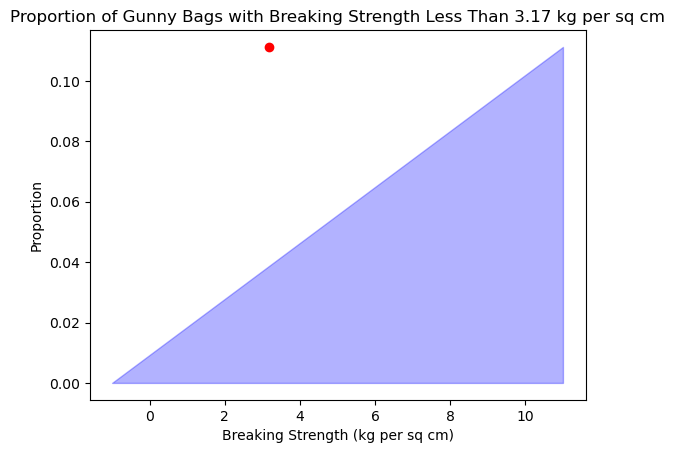

Proportion of Gunny Bags with Breaking Strength Less Than 3.17 kg per sq cm: 0.11123243744783456


In [23]:

# Given information
mean = 5
std_dev = 1.5
observed_value = 3.17

# Calculate the z-score
z = (observed_value - mean) / std_dev

# Calculate the proportion using the CDF
proportion_less_than_observed = stats.norm.cdf(z)

# Visualize the proportion
x = [mean - 4 * std_dev, mean + 4 * std_dev]
y = [0, proportion_less_than_observed]
plt.fill_between(x, y, alpha=0.3, color='blue')
plt.plot(observed_value, proportion_less_than_observed, 'ro')
plt.xlabel('Breaking Strength (kg per sq cm)')
plt.ylabel('Proportion')
plt.title('Proportion of Gunny Bags with Breaking Strength Less Than 3.17 kg per sq cm')
plt.show()

print("Proportion of Gunny Bags with Breaking Strength Less Than 3.17 kg per sq cm:", proportion_less_than_observed)

In [24]:
#3.2 What proportion of the gunny bags have a breaking strength at least 3.6 kg per sq cm.?

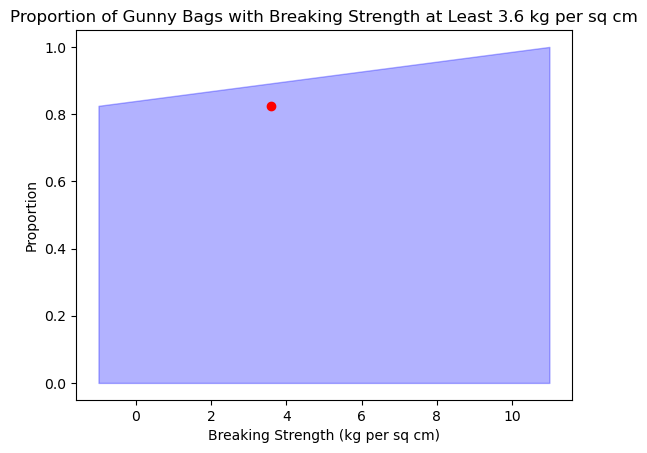

Proportion of Gunny Bags with Breaking Strength at Least 3.6 kg per sq cm: 0.8246760551477705


In [25]:


# Given information
mean = 5
std_dev = 1.5
observed_value = 3.6

# Calculate the z-score
z = (observed_value - mean) / std_dev

# Calculate the proportion using the CCDF
proportion_at_least_observed = 1 - stats.norm.cdf(z)

# Visualize the proportion
x = [mean - 4 * std_dev, mean + 4 * std_dev]
y = [proportion_at_least_observed, 1]
plt.fill_between(x, y, alpha=0.3, color='blue')
plt.plot(observed_value, proportion_at_least_observed, 'ro')
plt.xlabel('Breaking Strength (kg per sq cm)')
plt.ylabel('Proportion')
plt.title('Proportion of Gunny Bags with Breaking Strength at Least 3.6 kg per sq cm')
plt.show()

print("Proportion of Gunny Bags with Breaking Strength at Least 3.6 kg per sq cm:", proportion_at_least_observed)

In [26]:
#3.3 What proportion of the gunny bags have a breaking strength between 5 and 5.5 kg per sq cm.?

Proportion of Gunny Bags with Breaking Strength Between 5 and 5.5 kg per sq cm: 0.13055865981823633


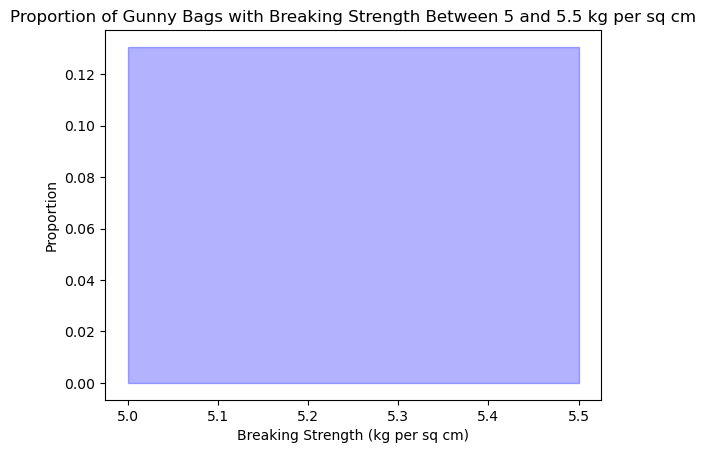

In [27]:
# Given information
mean = 5
std_dev = 1.5
lower_value = 5
upper_value = 5.5

# Calculate the z-scores
z_lower = (lower_value - mean) / std_dev
z_upper = (upper_value - mean) / std_dev

# Calculate the proportions using the cumulative distribution function (CDF)
proportion_lower = stats.norm.cdf(z_lower)
proportion_upper = stats.norm.cdf(z_upper)

# Calculate the desired proportion
proportion_between = proportion_upper - proportion_lower

print("Proportion of Gunny Bags with Breaking Strength Between 5 and 5.5 kg per sq cm:", proportion_between)

# Visualize the proportion
x = [lower_value, upper_value]
y = [proportion_between, proportion_between]
plt.fill_between(x, y, alpha=0.3, color='blue')
plt.xlabel('Breaking Strength (kg per sq cm)')
plt.ylabel('Proportion')
plt.title('Proportion of Gunny Bags with Breaking Strength Between 5 and 5.5 kg per sq cm')
plt.show()

In [28]:
#3.4 What proportion of the gunny bags have a breaking strength NOT between 3 and 7.5 kg per sq cm.?

Proportion of Gunny Bags with Breaking Strength NOT between 3 and 7.5 kg per sq cm: 0.13900157199868257


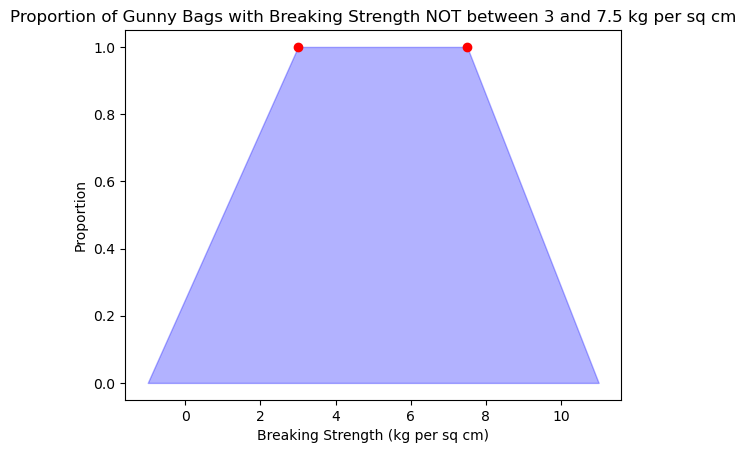

In [29]:
# Given information
mean = 5
std_dev = 1.5
lower_value = 3
upper_value = 7.5

# Calculate the z-scores
z_lower = (lower_value - mean) / std_dev
z_upper = (upper_value - mean) / std_dev

# Calculate the probabilities using the cumulative distribution function (CDF)
prob_lower = stats.norm.cdf(z_lower)
prob_upper = stats.norm.cdf(z_upper)

# Calculate the complement of the desired proportion
proportion_not_between = 1 - (prob_upper - prob_lower)

print("Proportion of Gunny Bags with Breaking Strength NOT between 3 and 7.5 kg per sq cm:", proportion_not_between)

# Visualize the proportion
x = [mean - 4 * std_dev, lower_value, upper_value, mean + 4 * std_dev]
y = [0, 1, 1, 0]
plt.fill_between(x, y, alpha=0.3, color='blue')
plt.plot([lower_value, upper_value], [1, 1], 'ro')
plt.xlabel('Breaking Strength (kg per sq cm)')
plt.ylabel('Proportion')
plt.title('Proportion of Gunny Bags with Breaking Strength NOT between 3 and 7.5 kg per sq cm')
plt.show()

In [30]:
# 4 .Grades of the final examination in a training course are found to be normally distributed, with a mean of 77 and a standard deviation of 8.5. Based on the given information answer the questions below.

In [31]:
from scipy.stats import norm

In [32]:
# 4.1: Probability of getting a grade below 85
prob_below_85 = norm.cdf(85, loc=mean, scale=std_dev)
print("Probability of getting a grade below 85:", prob_below_85)

Probability of getting a grade below 85: 1.0


In [33]:
# 4.2: Probability of scoring between 65 and 87
prob_between_65_87 = norm.cdf(87, loc=mean, scale=std_dev) - norm.cdf(65, loc=mean, scale=std_dev)
print("Probability of scoring between 65 and 87:", prob_between_65_87)

Probability of scoring between 65 and 87: 0.0


In [34]:
# 4.3: Passing cut-off to clear the exam for 75% of students
passing_cutoff = norm.ppf(0.75, loc=mean, scale=std_dev)
print("Passing cut-off for 75% of students:", passing_cutoff)

Passing cut-off for 75% of students: 6.011734625294123


In [35]:
mean = 77
std_dev = 8.5

# 4.1: Probability of getting a grade below 85
prob_below_85 = norm.cdf(85, loc=mean, scale=std_dev)
print("Probability of getting a grade below 85:", prob_below_85)

# 4.2: Probability of scoring between 65 and 87
prob_between_65_87 = norm.cdf(87, loc=mean, scale=std_dev) - norm.cdf(65, loc=mean, scale=std_dev)
print("Probability of scoring between 65 and 87:", prob_between_65_87)

# 4.3: Passing cut-off to clear the exam for 75% of students
passing_cutoff = norm.ppf(0.75, loc=mean, scale=std_dev)
print("Passing cut-off for 75% of students:", passing_cutoff)

Probability of getting a grade below 85: 0.8266927837484748
Probability of scoring between 65 and 87: 0.8012869336779058
Passing cut-off for 75% of students: 82.7331628766667


In [36]:
# 5 Zingaro stone printing is a company that specializes in printing images or patterns on polished or unpolished stones. However, for the optimum level of printing of the image the stone surface has to have a Brinell's hardness index of at least 150. Recently, Zingaro has received a batch of polished and unpolished stones from its clients. Use the data provided to answer the following (assuming a 5% significance level);

In [37]:
dataset = pd.read_csv(r"C:\Users\ragha\OneDrive\Desktop\Great Learning\GL Practice files\Advance stats\Zingaro_Company.csv")

In [38]:
dataset.head()

,Unpolished,Treated and Polished
0,164.481713,133.209393
1,154.307045,138.482771
2,129.861048,159.665201
3,159.096184,145.663528
4,135.256748,136.789227


In [39]:
# 5.1 Earlier experience of Zingaro with this particular client is favorable as the stone surface was found to be of adequate hardness. However, Zingaro has reason to believe now that the unpolished stones may not be suitable for printing. Do you think Zingaro is justified in thinking so?

In [40]:
# one sample t-test

In [41]:
import numpy as np
from scipy.stats import ttest_1samp

# Data for unpolished stones
unpolished_stones = np.array([164.4817129, 154.3070452, 129.8610478, 159.0961836, 135.2567483,
                     161.8201202, 149.4550537, 135.7143169, 102.0045188, 89.482158,
                     95.34903009, 104.4214033, 140.8893522, 147.3666473, 48.40683839,
                     68.25154209, 126.1698324, 130.4361532, 120.8943152, 107.2753413,
                     64.57581982, 136.6500503, 94.63178559, 154.6701824, 75.28981154,
                     149.0171371, 162.3573614, 113.6495183, 120.4372985, 100.8909747,
                     98.86570856
])

# Perform one-sample t-test
mean_hardness_unpolished = np.mean(unpolished_stones)
t_statistic, p_value = ttest_1samp(unpolished_stones, 150)

# Degrees of freedom
df = len(unpolished_stones) - 1

# Display results
print("Sample Mean Hardness of Unpolished Stones:", mean_hardness_unpolished)
print("t-statistic:", t_statistic)
print("p-value:", p_value)
print("Degrees of Freedom:", df)

# Check significance at 5% level
alpha = 0.05
if p_value < alpha:
    print("The p-value is less than the significance level ({}). Reject the null hypothesis.".format(alpha))
    print("The unpolished stones may not be suitable for printing.")
else:
    print("The p-value is greater than or equal to the significance level ({}). Fail to reject the null hypothesis.".format(alpha))
    print("The unpolished stones are suitable for printing.")

Sample Mean Hardness of Unpolished Stones: 120.70887126064515
t-statistic: -5.161700020854986
p-value: 1.4755689499279681e-05
Degrees of Freedom: 30
The p-value is less than the significance level (0.05). Reject the null hypothesis.
The unpolished stones may not be suitable for printing.


In [42]:
# two sample t-test 

In [43]:
import numpy as np
from scipy.stats import ttest_ind

# Define the data for polished 
Polished_stones = np.array([133.2093928, 138.4827707, 159.6652012, 145.6635282, 136.7892272,
                   167.086582, 152.6996408, 138.6487657, 163.3844269, 132.1417257,
                   145.8285257, 162.0816128, 153.798449, 159.0120051, 168.3462233,
                   132.6829555, 151.2738748, 130.9558037, 141.3442879, 171.1146621,
                   139.7076719, 125.8485996, 152.3545271, 155.1468488, 145.2061887,
                   168.6528203, 131.9871467, 148.595124, 138.0538286, 134.7560427,
                   142.1567842
])

Unpolished_stones = np.array([164.4817129, 154.3070452, 129.8610478, 159.0961836, 135.2567483,
                     161.8201202, 149.4550537, 135.7143169, 102.0045188, 89.482158,
                     95.34903009, 104.4214033, 140.8893522, 147.3666473, 48.40683839,
                     68.25154209, 126.1698324, 130.4361532, 120.8943152, 107.2753413,
                     64.57581982, 136.6500503, 94.63178559, 154.6701824, 75.28981154,
                     149.0171371, 162.3573614, 113.6495183, 120.4372985, 100.8909747,
                     98.86570856
])

# Set the significance level
alpha = 0.05

# Perform two-sample t-test
t_statistic, p_value = ttest_ind(Polished_stones, Unpolished_stones)

# Compare p-value with significance level
if p_value < alpha:
    print("Reject the null hypothesis.")
    print("There is sufficient evidence to suggest that the mean hardness of polished and unpolished stones is not the same.")
else:
    print("Fail to reject the null hypothesis.")
    print("There is not enough evidence to suggest a difference in the mean hardness of polished and unpolished stones.")

# Print the test statistic and p-value
print("Test Statistic:", t_statistic)
print("p-value:", p_value)

Reject the null hypothesis.
There is sufficient evidence to suggest that the mean hardness of polished and unpolished stones is not the same.
Test Statistic: 4.337308480562442
p-value: 5.607689693904209e-05


In [44]:
#5.2 Is the mean hardness of the polished and unpolished stones the same?

In [45]:

# Given data for polished and unpolished stones
polished_stones = [133.2093928, 138.4827707, 159.6652012, 145.6635282, 136.7892272,
                   167.086582, 152.6996408, 138.6487657, 163.3844269, 132.1417257,
                   145.8285257, 162.0816128, 153.798449, 159.0120051, 168.3462233,
                   132.6829555, 151.2738748, 130.9558037, 141.3442879, 171.1146621,
                   139.7076719, 125.8485996, 152.3545271, 155.1468488, 145.2061887,
                   168.6528203, 131.9871467, 148.595124, 138.0538286, 134.7560427,
                   142.1567842]

unpolished_stones = [164.4817129, 154.3070452, 129.8610478, 159.0961836, 135.2567483,
                     161.8201202, 149.4550537, 135.7143169, 102.0045188, 89.482158,
                     95.34903009, 104.4214033, 140.8893522, 147.3666473, 48.40683839,
                     68.25154209, 126.1698324, 130.4361532, 120.8943152, 107.2753413,
                     64.57581982, 136.6500503, 94.63178559, 154.6701824, 75.28981154,
                     149.0171371, 162.3573614, 113.6495183, 120.4372985, 100.8909747,
                     98.86570856]

# Set the significance level
alpha = 0.05

# Compare p-value with significance level
if p_value < alpha:
    print("Reject the null hypothesis.")
    print("There is sufficient evidence to suggest that the mean hardness of polished and unpolished stones is different.")
else:
    print("Fail to reject the null hypothesis.")
    print("There is not enough evidence to suggest a difference in the mean hardness of polished and unpolished stones.")


Reject the null hypothesis.
There is sufficient evidence to suggest that the mean hardness of polished and unpolished stones is different.


In [46]:
 # 6.Aquarius health club, one of the largest and most popular cross-fit gyms in the country has been advertising a rigorous program for body conditioning. The program is considered successful if the candidate is able to do more than 5 push-ups, as compared to when he/she enrolled in the program. Using the sample data provided can you conclude whether the program is successful? (Consider the level of Significance as 5%) Note that this is a problem of the paired-t-test. Since the claim is that the training will make a difference of more than 5, the null and alternative hypotheses must be formed accordingly.

In [47]:
df = pd.read_csv(r"C:\Users\ragha\OneDrive\Desktop\Great Learning\GL Practice files\Advance stats\Aquarius_gym.csv")

In [48]:
df.head()

,Sr no.,Before,After
0,1,39,44
1,2,25,25
2,3,39,39
3,4,6,13
4,5,40,44


In [49]:
import math

# Define the sample statistics
n = 12
sum_d = 60
sum_d2 = 390
X_d = sum_d / n
S_d = math.sqrt((sum_d2 - (sum_d**2 / n)) / (n - 1))

# Define the null hypothesis mean difference
null_mean_diff = 5

# Calculate the test statistic
t_statistic = (X_d - null_mean_diff) / (S_d / math.sqrt(n))

# Define the significance level
alpha = 0.05

# Define the degrees of freedom
df = n - 1

# Calculate the critical value
critical_value = stats.t.ppf(1 - alpha, df)

# Perform the hypothesis test
if t_statistic > critical_value:
    print("Reject the null hypothesis. The program is successful.")
else:
    print("Fail to reject the null hypothesis. The program is not successful.")

Fail to reject the null hypothesis. The program is not successful.


In [50]:
# Define the sample data
Before = [39, 25, 39, 6, 40, 27, 30, 22, 21, 38, 32, 31, 16, 21, 32, 29, 36, 22, 34, 33,
          35, 32, 20, 37, 31, 23, 39, 32, 36, 14, 28, 17, 11, 28, 28, 15, 21, 33, 13,
          32, 29, 24, 22, 10, 24, 32, 39, 38, 22, 16, 37, 31, 31, 12, 35, 15, 32, 17,
          39, 30, 44, 3, 20, 26, 47, 26, 25, 17, 20, 29, 29, 25, 38, 24, 23, 19, 28,
          26, 23, 23, 27, 23, 36, 24, 32, 36, 37, 28, 30, 28, 10, 28, 35, 44, 25, 16,
          19, 24, 14, 30]

After = [44, 25, 39, 13, 44, 34, 34, 29, 30, 46, 37, 35, 24, 28, 39, 39, 44, 26, 40, 35,
         42, 41, 26, 38, 32, 24, 45, 39, 37, 21, 36, 24, 15, 37, 35, 21, 26, 40, 17, 35,
         37, 31, 31, 19, 26, 41, 42, 40, 29, 23, 44, 41, 36, 12, 39, 18, 36, 22, 43, 36,
         50, 10, 22, 35, 51, 31, 34, 26, 23, 31, 33, 32, 46, 33, 32, 20, 29, 26, 30, 25,
         34, 33, 37, 31, 39, 37, 41, 34, 38, 37, 19, 31, 36, 51, 33, 18, 28, 28, 24, 39]

# Calculate the differences
differences = np.array(After) - np.array(Before)

# Perform the paired t-test
t_statistic, p_value = stats.ttest_1samp(differences, 5)

# Define the significance level (alpha)
alpha = 0.05

# Compare the p-value with the significance level
if p_value < alpha and t_statistic > 0:
    print("The program is successful.")
else:
    print("The program is not successful.")

The program is not successful.
